In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKerasTF

from sklearn.metrics import r2_score,mean_squared_error

In [2]:
!pip install livelossplot

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold_data.corr()

<Axes: >

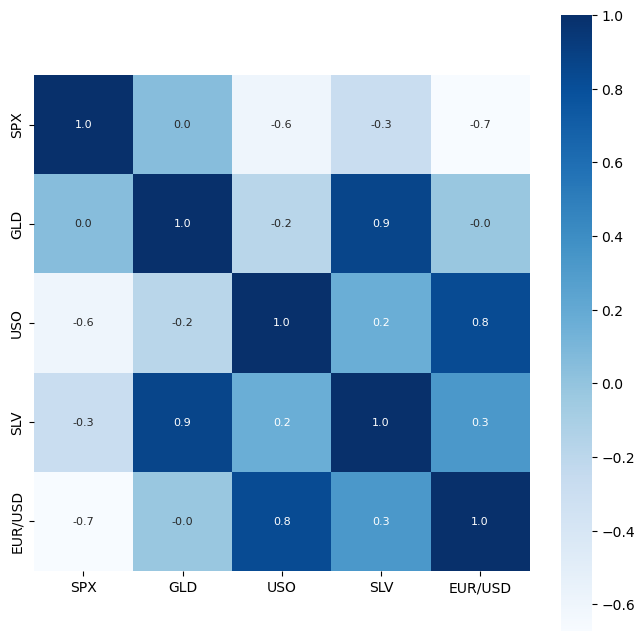

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

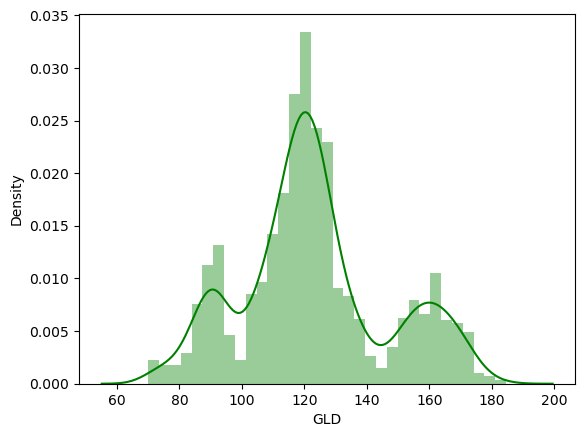

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1832, 4)
(1832,)
(458, 4)
(458,)


### Scaling the data

In [18]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying Regression Algorithms

In [19]:
regression_algorithms = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

In [20]:
scores = []
for algorithm in regression_algorithms:
    model = algorithm
    model.fit(X_train_scaled, Y_train) 
    
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(Y_test, y_pred)
    scores.append((algorithm.__class__.__name__, r2))

In [21]:
scores

[('LinearRegression', 0.8657886565869237),
 ('DecisionTreeRegressor', 0.9840321887575278),
 ('RandomForestRegressor', 0.989024745834564),
 ('GradientBoostingRegressor', 0.9765841359611487),
 ('SVR', 0.9382723943216776)]

In [22]:
Results = pd.DataFrame(scores, columns=['Algorithm', 'R-squared Score'])
Results = Results.sort_values(by='R-squared Score', ascending=False)

In [23]:
Results

,Algorithm,R-squared Score
2,RandomForestRegressor,0.989025
1,DecisionTreeRegressor,0.984032
3,GradientBoostingRegressor,0.976584
4,SVR,0.938272
0,LinearRegression,0.865789


Now applying <b>ANN</b> to see if it performs better than <b>RandomForestRegressor</B>!

### ANN

In [24]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


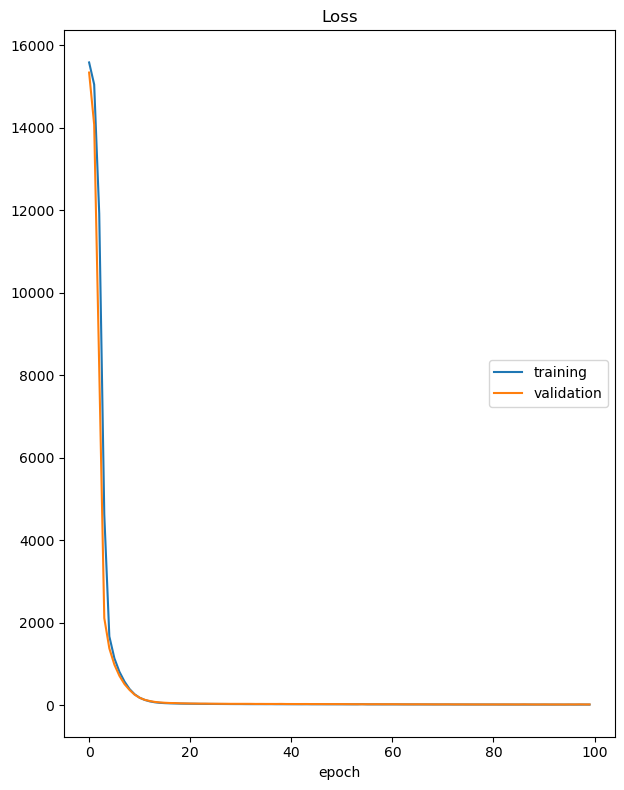

Loss
	training         	 (min:   15.843, max: 15585.145, cur:   15.843)
	validation       	 (min:   19.117, max: 15340.100, cur:   20.363)
58/58 [==============================] - 1s 9ms/step - loss: 15.8428 - val_loss: 20.3632


In [26]:
model.fit(X_train_scaled, Y_train,validation_data=(X_test_scaled,Y_test), epochs=100, batch_size=32,callbacks=[PlotLossesKerasTF()])

In [27]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)

15/15 [==============================] - 0s 2ms/step
R-squared score: 0.961392680792892


In [28]:
#Adding ANN score in our Results Dataframe
ann = pd.Series({'Algorithm': 'ANN', 'R-squared Score': 0.9641062433201001})
Results = Results.append(ann, ignore_index=True)

In [29]:
Results

,Algorithm,R-squared Score
0,RandomForestRegressor,0.989025
1,DecisionTreeRegressor,0.984032
2,GradientBoostingRegressor,0.976584
3,SVR,0.938272
4,LinearRegression,0.865789
5,ANN,0.964106


In [30]:
Results = Results.sort_values(by='R-squared Score', ascending=False)
Results

,Algorithm,R-squared Score
0,RandomForestRegressor,0.989025
1,DecisionTreeRegressor,0.984032
2,GradientBoostingRegressor,0.976584
5,ANN,0.964106
3,SVR,0.938272
4,LinearRegression,0.865789


<b>RandomForestRegressor</b> performed best in our dataset with an r2_score of <b>0.989025</b> and <b>LinearRegression</b> performed worst in our dataset with r2_score of <b>0.865789</b>.